In [3]:
from sklearn.datasets import  make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative =1,n_targets=1,noise=20,random_state=13)

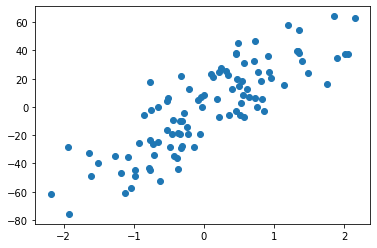

In [5]:
plt.scatter(X,y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [14]:
y_pred =lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [21]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b= -120
        self.lr=learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slop_b = -2*np.sum(y - self.m*X.ravel()-self.b)
            loss_slop_m = -2*np.sum((y - self.m*X.ravel()-self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slop_b)
            self.m = self.m -(self.lr * loss_slop_m)
        print(self.m,self.b)
    def predict(self,X):
        return self.m * X + self.b

In [16]:
gd = GDRegressor(0.001,50)

In [17]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [18]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579